In [87]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [88]:
bestsellers_csv = "bestsellers with categories.csv"

In [89]:
# Task 3.1 Прочитайте csv файл (використовуйте функцію read_csv)
df = pd.read_csv(bestsellers_csv)

In [90]:
# Task 3.2 Виведіть перші п'ять рядків (використовується функція head)
df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [91]:
# Task 3.3 Виведіть розміри датасету (використовуйте атрибут shape)
df.shape

(550, 7)

In [92]:
# Task 3.4
# Про скільки книг зберігає дані датасет?
# 550

In [93]:
df.columns = ["name", "author", "user_rating", "reviews", "price", "year", "genre"]

In [94]:
# Task 3.5 Перевірте, чи у всіх рядків вистачає даних: виведіть кількість
# пропусків (na) у кожному зі стовпців (використовуйте функції isna та sum)
np.sum(df.isnull())

name           0
author         0
user_rating    0
reviews        0
price          0
year           0
genre          0
dtype: int64

In [95]:
# Task 3.6 Перевірте, які є унікальні значення в колонці
# genre (використовуйте функцію unique)
pd.unique(df["genre"])

# Відповідь: Які є унікальні жанри?
# Non Fiction, Fiction

array(['Non Fiction', 'Fiction'], dtype=object)

<AxesSubplot:title={'center':'Price Frequency'}, ylabel='Frequency'>

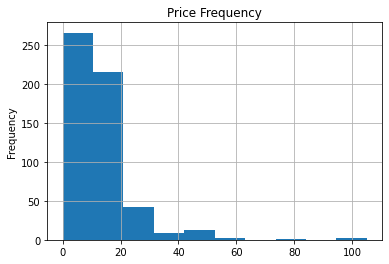

In [96]:
# Task 3.7 Тепер подивіться на розподіл цін:
# побудуйте діаграму (використовуйте kind='hist')
df["price"].plot(kind="hist", title="Price Frequency", grid=True)

In [97]:
# Task 3.8 Визначте, яка ціна у нас максимальна, мінімальна, середня,
# медіанна (використовуйте функції max, min, mean, median)
prices = df["price"]
max_p = prices.max()
min_p = prices.min()
mean_p = prices.mean()
median_p = prices.median()
# Відповідь: Максимальна ціна? - 105
# Відповідь: Мінімальна ціна? - 0
# Відповідь: Середня ціна? - 13.1
# Відповідь: Медіанна ціна? - 11.0

In [98]:
# Task 3.9 Який рейтинг у датасеті найвищий? Відповідь: 4.9
highest_rating = df["user_rating"].max()

In [99]:
# Task 3.10 Скільки книг мають такий рейтинг? Відповідь: 52
hr_books_df = df[df["user_rating"] >= highest_rating]
quantity = hr_books_df["name"].count()

In [100]:
# Task 3.11 Яка книга має найбільше відгуків? Відповідь: Where the Crawdads Sing
most_revs_book = df[df["reviews"] == df["reviews"].max()]["name"]

In [101]:
# Task 3.12 З тих книг, що потрапили до Топ-50 у 2015 році,
# яка книга найдорожча (можна використати проміжний датафрейм)? Відповідь: Humans of New York : Stories
top_50_2015 = (
    df.sort_values(by="user_rating", ascending=False).head(50).loc[(df["year"] == 2015)]
)
most_exp_book_2015 = top_50_2015[
    top_50_2015["price"] == top_50_2015["price"].max()
].name

In [102]:
# Task 3.13 Скільки книг жанру Fiction потрапили до Топ-50 у 2010 році (використовуйте &)? Відповідь: 2
fiction_2010 = len(
    df.sort_values(by="reviews", ascending=False)
    .head(50)
    .loc[((df["year"] == 2010) & (df["genre"] == "Fiction"))]
)

In [103]:
# Task 3.14 Скільки книг з рейтингом 4.9 потрапило до рейтингу
# у 2010 та 2011 роках (використовуйте | або функцію isin)? Відповідь: 1
b49 = df[
    (df["year"] == 2011) & (df["user_rating"] == 4.9)
    | (df["year"] == 2010) & (df["user_rating"] == 4.9)
]

In [104]:
# Task 3.15  насамкінець, давайте відсортуємо за зростанням ціни всі книги, які потрапили до
# рейтингу в 2015 році і коштують дешевше за 8 доларів (використовуйте функцію sort_values).
# Відповідь: Яка книга остання у відсортованому списку? Відповідь: Old School (Diary of a Wimpy Kid #10)
books_2015 = df[df["year"] == 2015].sort_values(by="price", ascending=True)
cheap_books_2015 = books_2015[(books_2015["price"] < 8)]
last_book = cheap_books_2015.tail(1).name

In [105]:
# Task 3.16 Для початку давайте подивимося на максимальну та мінімальну
# ціни для кожного з жанрів (використовуйте функції groupby та agg,
# для підрахунку мінімальних та максимальних значень використовуйте max та min). Не беріть усі стовпці, виберіть тільки потрібні вам
genre_prices = df.groupby("genre")["price"].agg(["min", "max"])

# Максимальна ціна для жанру Fiction: 82
# Мінімальна ціна для жанру Fiction: 0
# Максимальна ціна для жанру Non Fiction: 105
# Мінімальна ціна для жанру Non Fiction: 0

In [106]:
# Task 3.17 Тепер створіть новий датафрейм, який вміщатиме кількість книг
# для кожного з авторів (використовуйте функції groupby та agg, для підрахунку
# кількості використовуйте count). Не беріть усі стовпці, виберете тільки потрібні
df = df.drop_duplicates(subset=["name"])
books = df.groupby(["author"], group_keys=False)["name"].count()
books.sort_values(ascending=True).tail(1)
df1 = pd.DataFrame(books)
# Якої розмірності вийшла таблиця? Відповідь: (248, 1)
# Який автор має найбільше книг? Відповідь: Jeff Kinney
# Скільки книг цього автора? Відповідь: 12

In [107]:
# Task 3.18 Tепер створіть другий датафрейм, який буде вміщати середній рейтинг для кожного
# автора (використовуйте функції groupby та agg, для підрахунку середнього значення використовуйте mean).
# Не беріть усі стовпці, виберете тільки потрібні

mean_rating = df.groupby(["author"], group_keys=False)["user_rating"].agg("mean")
mean_rating.sort_values(ascending=False).tail(1)
df2 = pd.DataFrame(mean_rating)

# У якого автора середній рейтинг мінімальний? Відповідь: Donna Tartt
# Який у цього автора середній рейтинг? Відповідь: 3.9

In [108]:
# Task 3.19 З'єднайте останні два датафрейми так, щоб для кожного автора було
# видно кількість книг та середній рейтинг
# (Використовуйте функцію concat з параметром axis=1). Збережіть результат у змінну

df3 = pd.concat([df1, df2], axis=1)

In [109]:
# Task 3.20 Відсортуйте датафрейм за зростаючою кількістю книг та зростаючим рейтингом (використовуйте функцію sort_values)
# Який автор перший у списку? Donna Tartt
df3.sort_values(by=["name", "user_rating"], ascending=True)

,name,user_rating
author,,
Donna Tartt,1,3.900000
Gallup,1,4.000000
Gillian Flynn,1,4.000000
Muriel Barbery,1,4.000000
Chris Cleave,1,4.100000
...,...,...
Bill O'Reilly,6,4.633333
Dav Pilkey,6,4.900000
Stephenie Meyer,7,4.657143


In [110]:
plt.close("all")

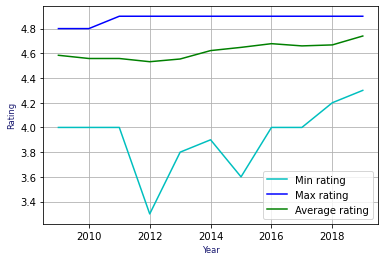

In [111]:
# Chart 1
df = pd.read_csv(bestsellers_csv)
df.columns = ["name", "author", "user_rating", "reviews", "price", "year", "genre"]
ratings = df.groupby(["year"])["user_rating"].agg(["min", "max", "mean"])
mr = ratings["min"]
mx = ratings["max"]
mn = ratings["mean"]

plt.plot(mr, "c", label="Min rating")
plt.plot(mx, "b", label="Max rating")
plt.plot(mn, "g", label="Average rating")
plt.xlabel("Year", fontsize="small", color="midnightblue")
plt.ylabel("Rating", fontsize="small", color="midnightblue")
plt.legend()
plt.grid()
plt.show()
plt.close("all")

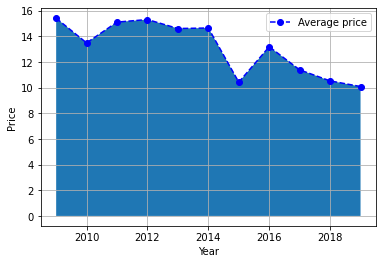

In [112]:
# Chart 2
df = pd.read_csv(bestsellers_csv)
df.columns = ["name", "author", "user_rating", "reviews", "price", "year", "genre"]
prices = df.groupby(["year"])["price"].agg("mean")
x = prices.index

plt.plot(prices, "b--o", label="Average price")
plt.fill_between(x, prices)
plt.xlabel("Year")
plt.ylabel("Price")
plt.legend()
plt.grid()
plt.show()
plt.close("all")

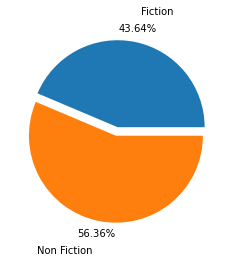

In [113]:
# Chart 3
df = pd.read_csv(bestsellers_csv)
df.columns = ["name", "author", "user_rating", "reviews", "price", "year", "genre"]
genres = df.groupby(["genre"])["genre"].count()
data = genres.values
labels = genres.index

plt.pie(
    data,
    labels=labels,
    shadow=False,
    explode=[0.10, 0.0],
    autopct="%.2f%%",
    pctdistance=1.15,
    labeldistance=1.35,
)

plt.show()